In [23]:
import eclib.datareader as dr
from ecliblight import processing, calculation
import matplotlib.pyplot as plt

In [24]:
# input_data = './test_data/imces/IMCES_M40_A40_*.nc'
# start = '2024-08-18 01:00:00'
# stop = '2024-08-20 01:00:00'

# input_data = './test_data/kgd/PIO_A36_*.nc'
# start = '2023-11-01 00:00:00'
# stop = '2023-11-04 00:00:00'

input_data = './test_data/msu/01/MSU_A1_*.nc'
start = '2023-01-01 00:00:00'
stop = '2023-02-01 00:00:00'

step = 30

In [25]:
%%time
df = dr.read_all_files(func=dr.nc_to_df, files_pattern=input_data)
df.rename(columns={'temp': 't'}, inplace=True)
df

CPU times: user 5.33 s, sys: 9.41 s, total: 14.7 s
Wall time: 24.3 s


,u,v,w,t
time,,,,
2023-01-01 00:00:00.021811200,-1.02,-2.32,0.15,-1.13
2023-01-01 00:00:00.071789824,-0.89,-2.18,0.62,-1.15
2023-01-01 00:00:00.121797376,-0.33,-2.32,0.75,-1.20
2023-01-01 00:00:00.171793664,-0.51,-2.04,0.81,-1.13
2023-01-01 00:00:00.221785344,-0.97,-1.98,1.05,-1.12
...,...,...,...,...
2023-01-31 23:59:59.719887104,-1.92,-0.92,-1.33,-1.92
2023-01-31 23:59:59.769876992,-2.07,-0.60,-1.16,-1.99
2023-01-31 23:59:59.819881216,-1.91,-0.63,-1.14,-2.02


In [8]:
%%time
df_moments = calculation(df, step, start, stop)

CPU times: user 1min 6s, sys: 21.5 s, total: 1min 28s
Wall time: 1min 58s


In [9]:
%%time 
df1 = processing(df, step, start, stop)

CPU times: user 4min 5s, sys: 33.2 s, total: 4min 38s
Wall time: 4min 50s


In [10]:
%%time
df1_moments = calculation(df1, step, start, stop)

CPU times: user 1min 3s, sys: 22.5 s, total: 1min 26s
Wall time: 1min 49s


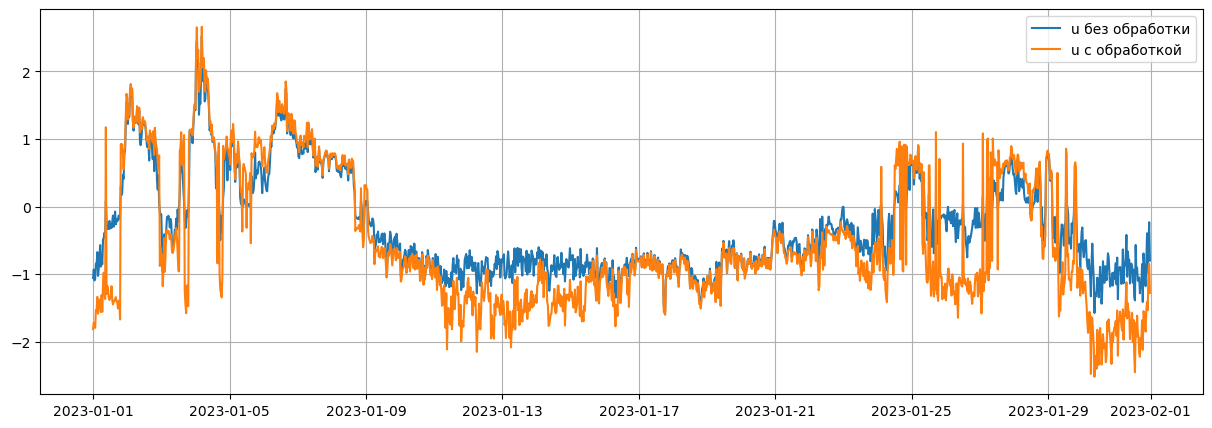

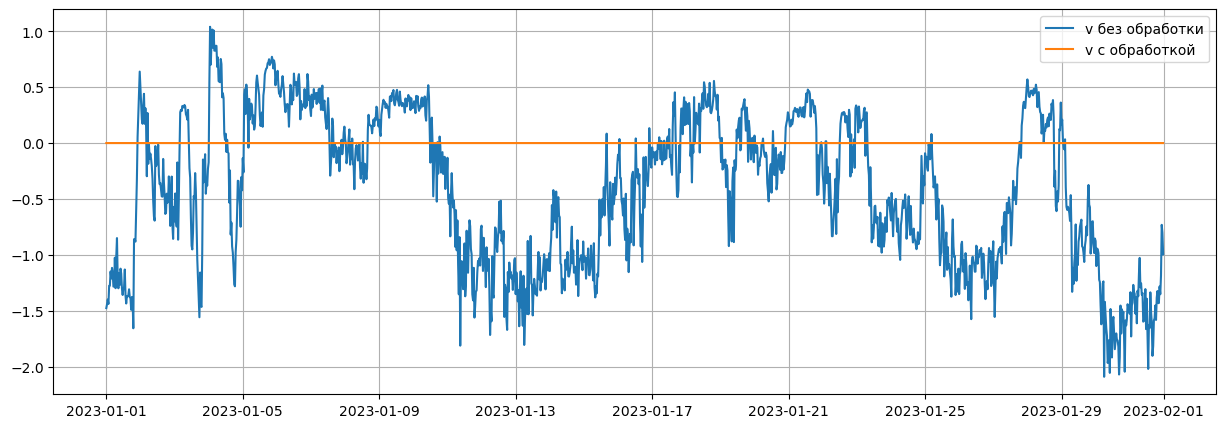

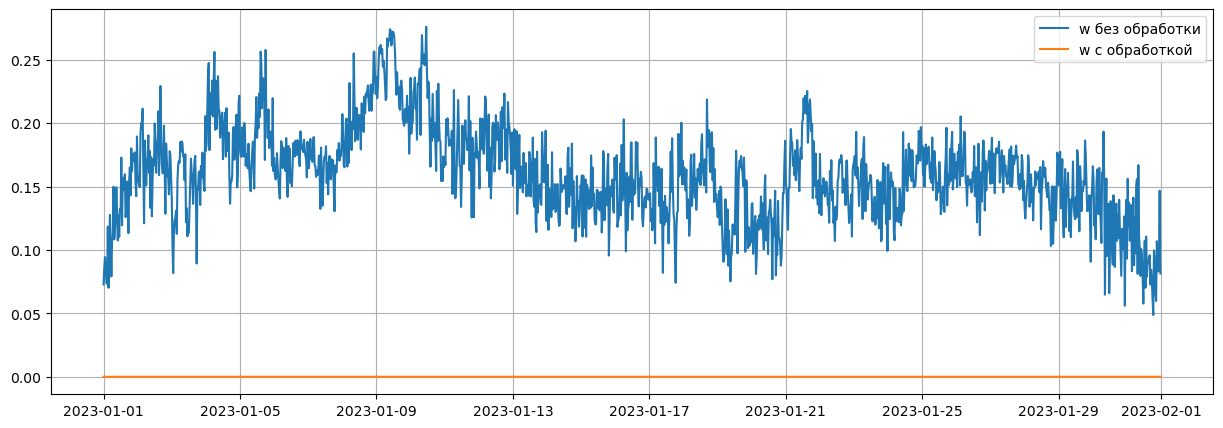

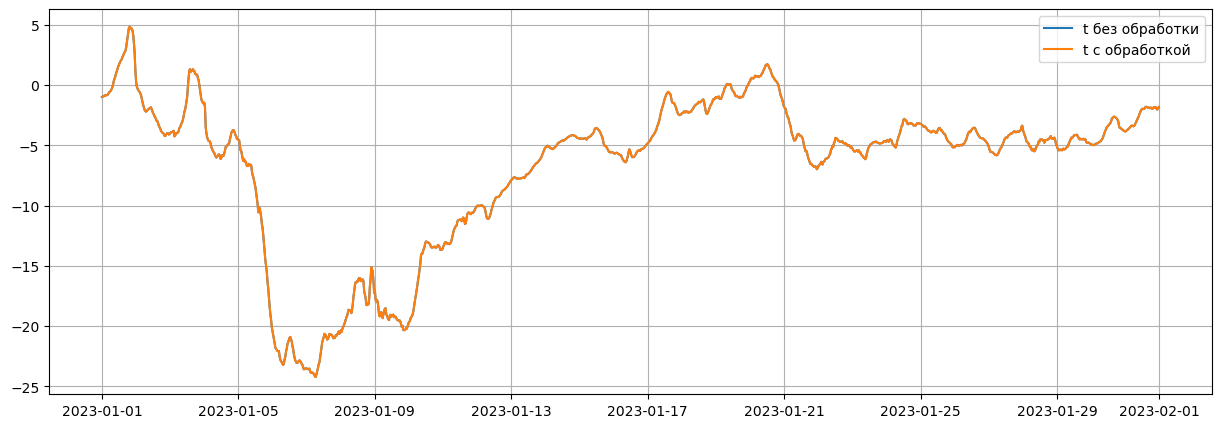

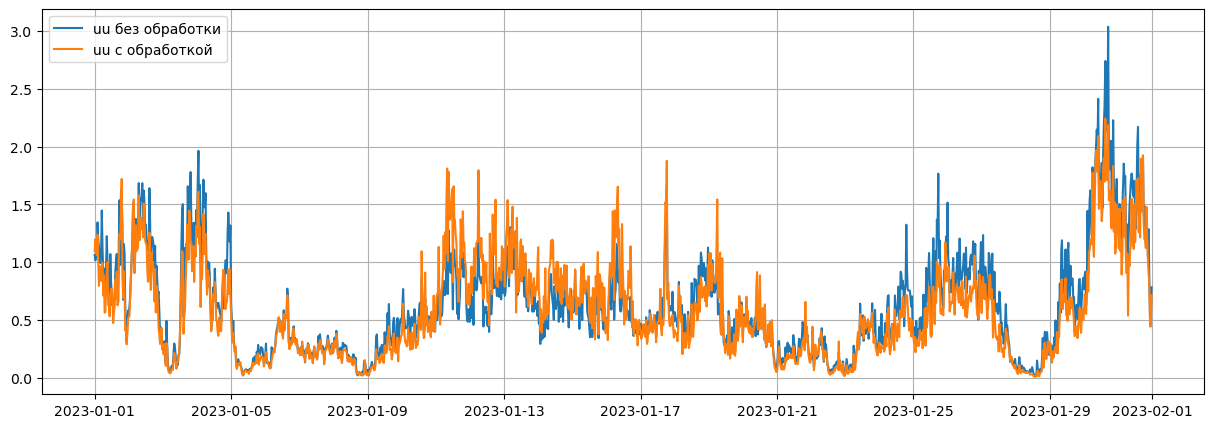

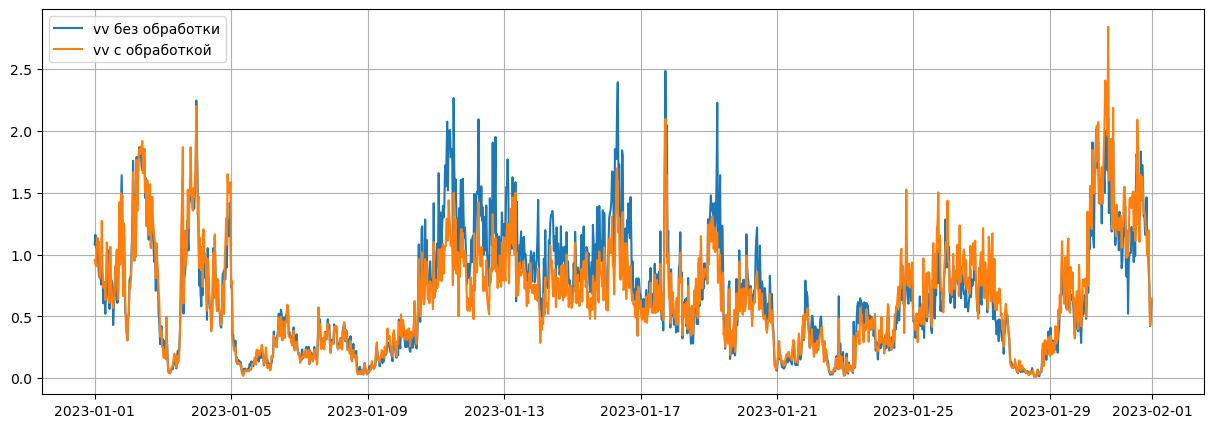

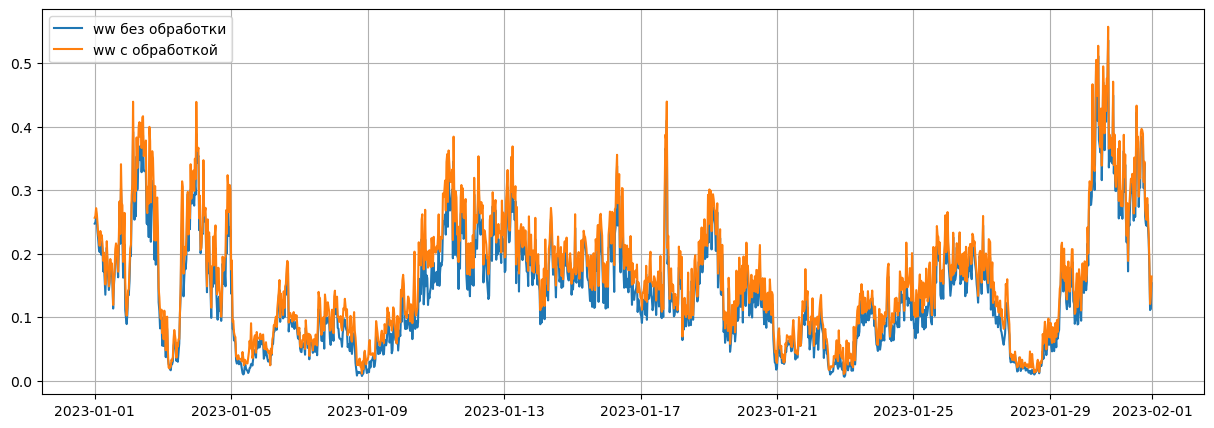

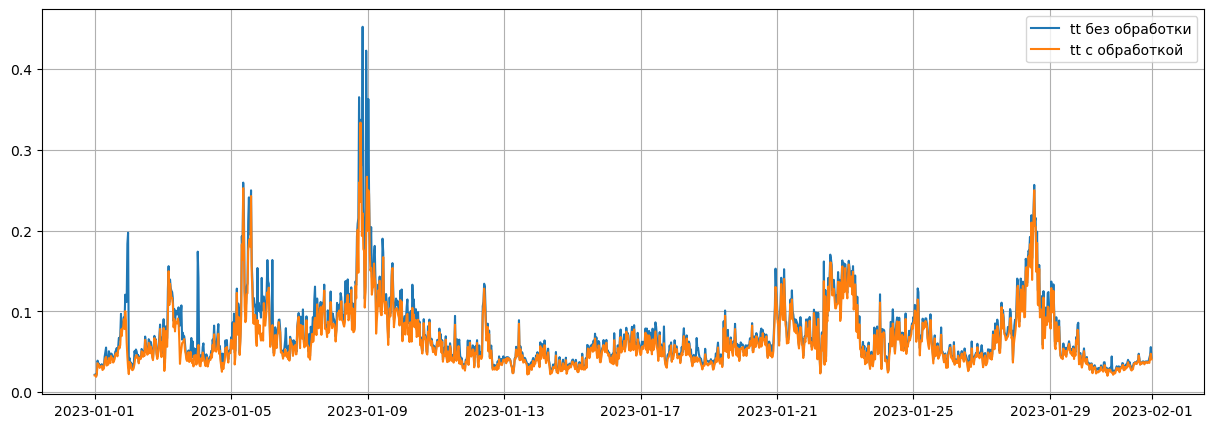

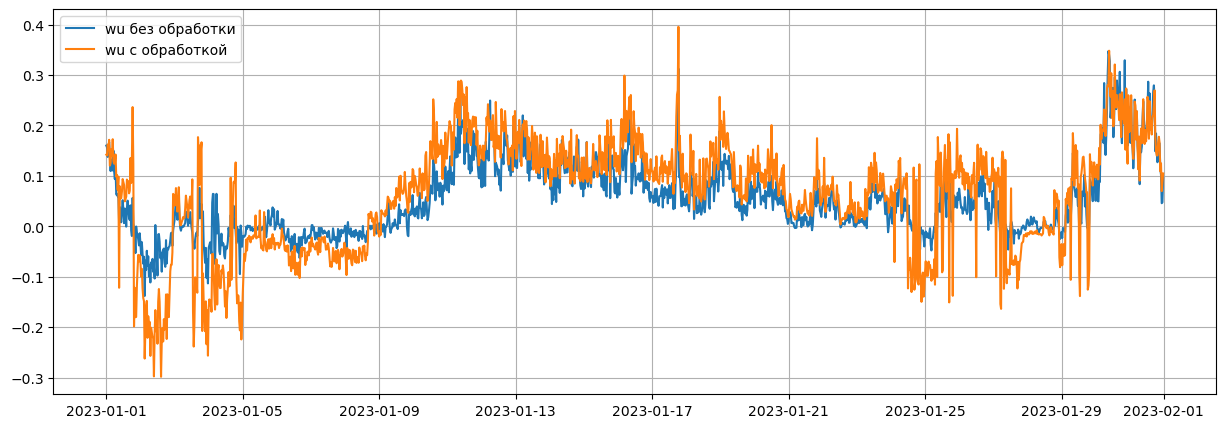

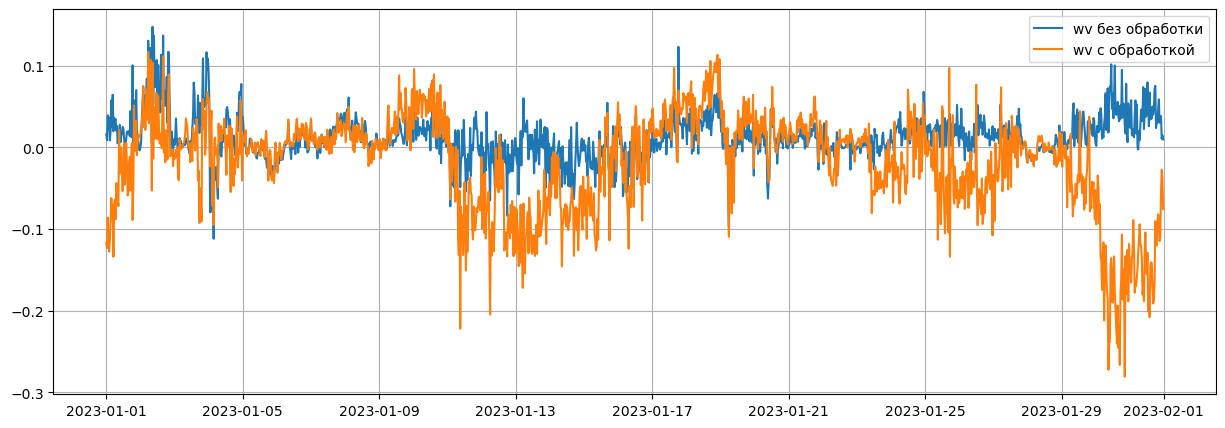

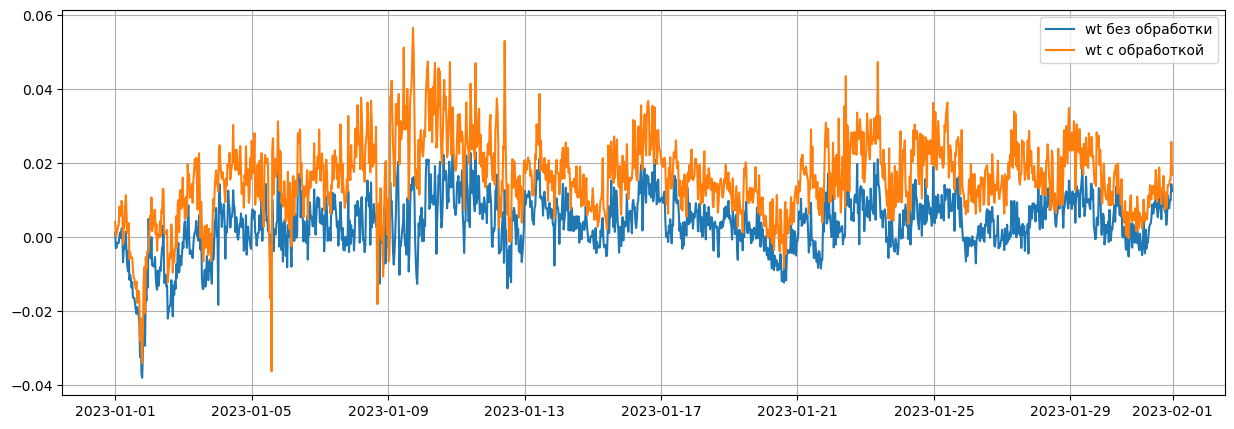

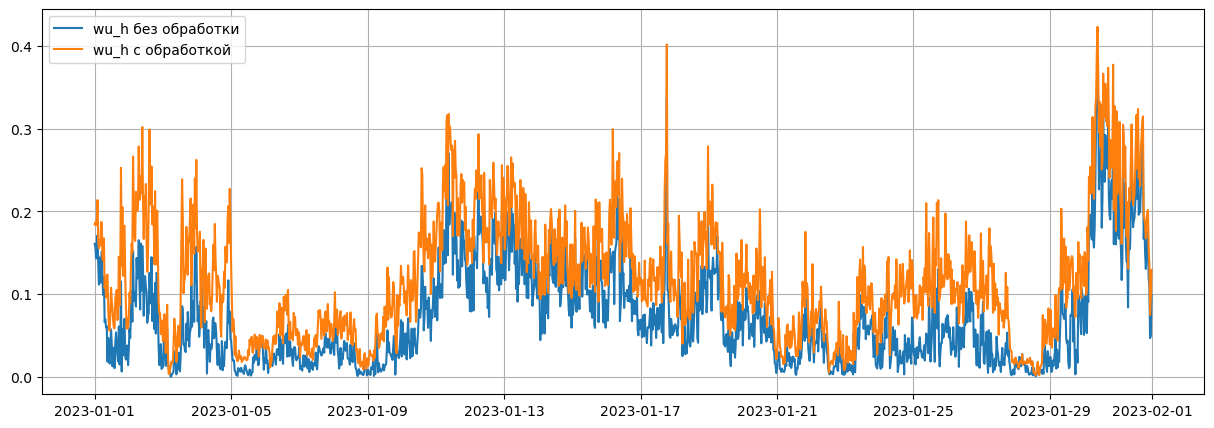

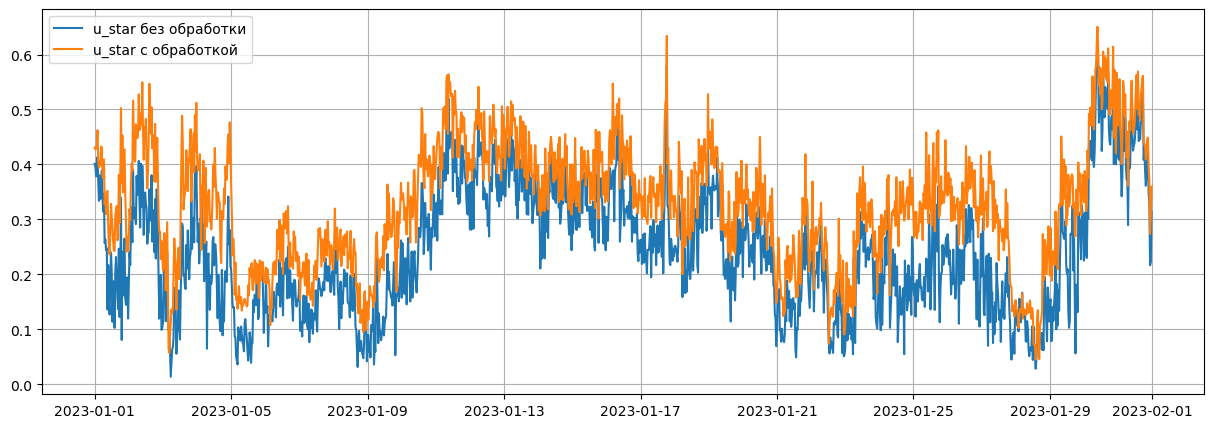

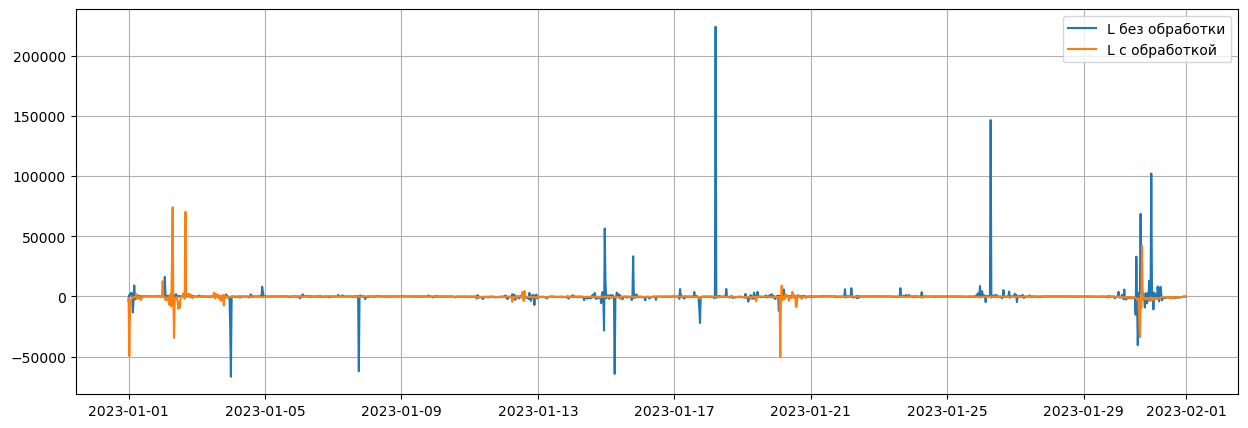

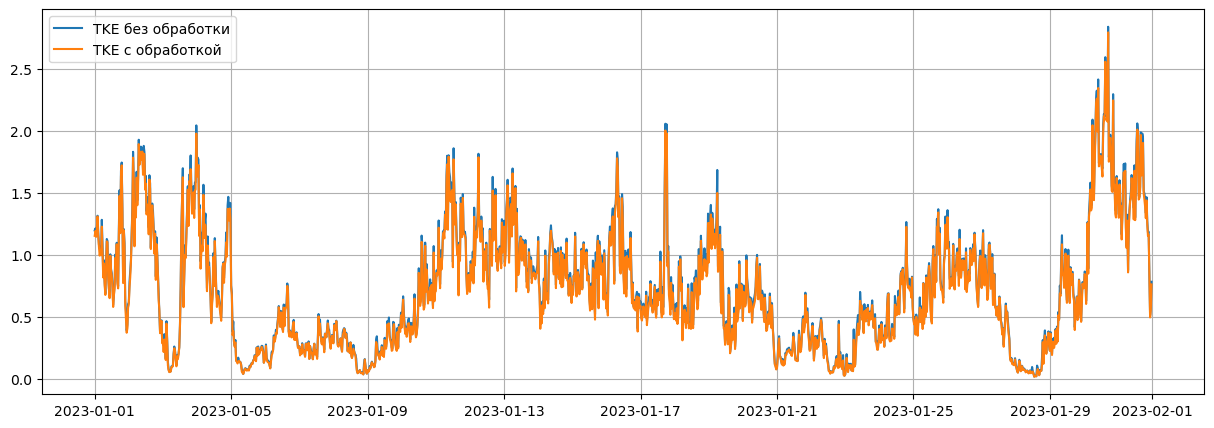

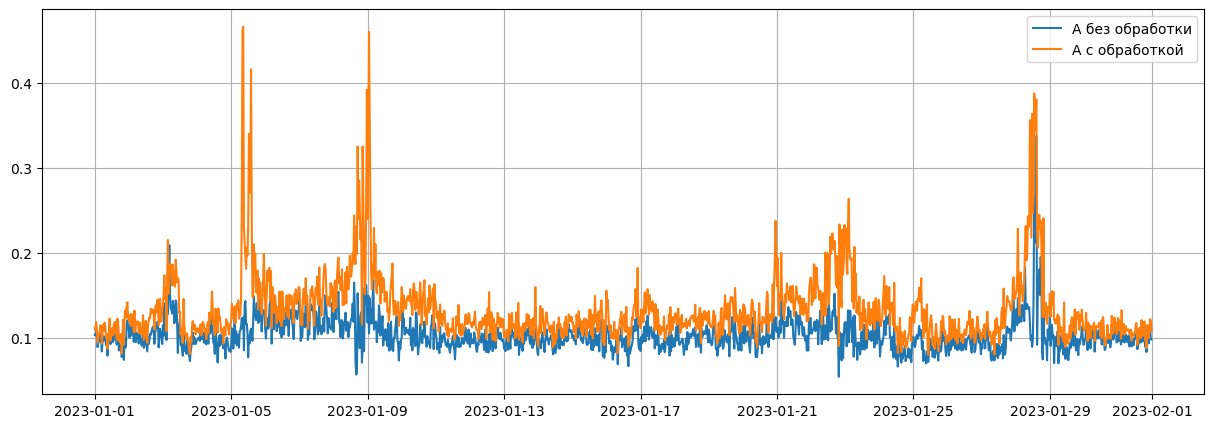

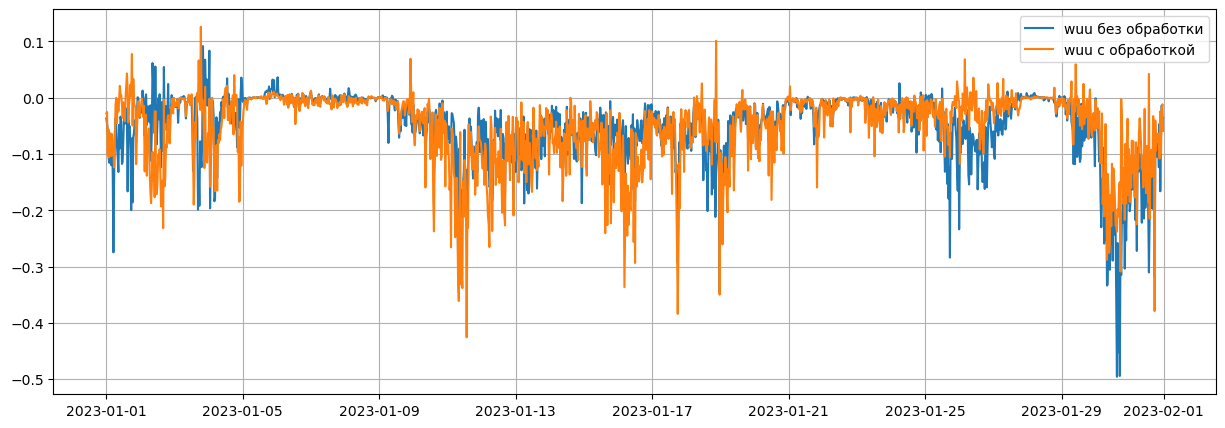

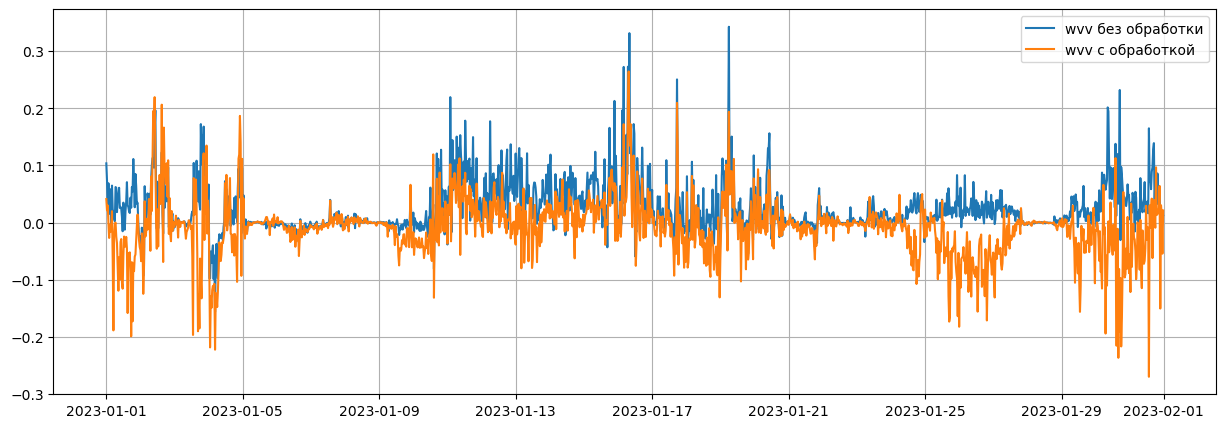

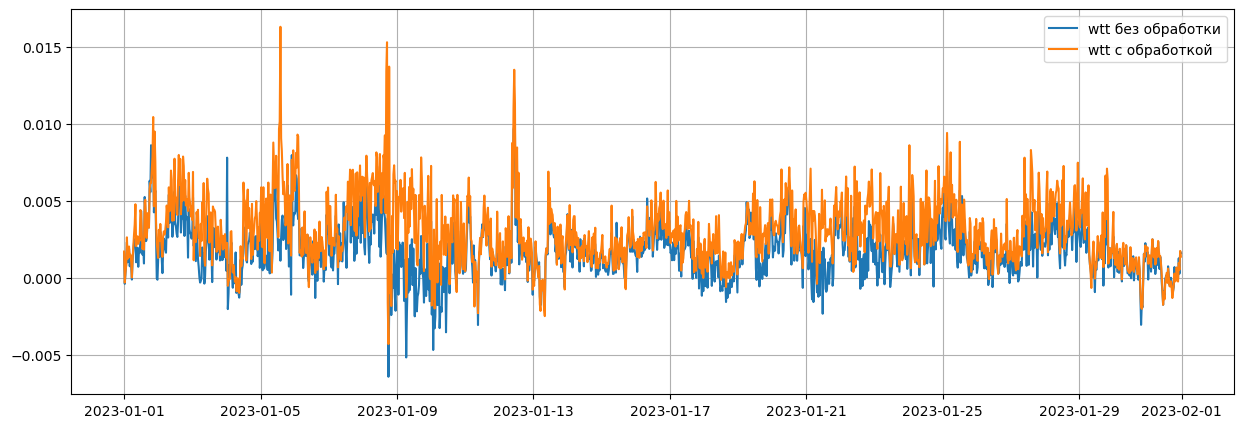

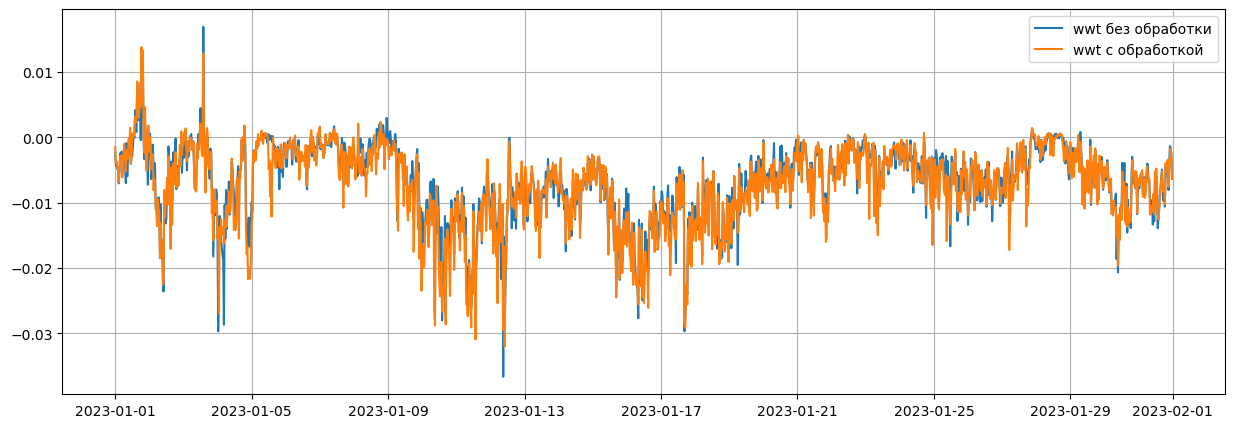

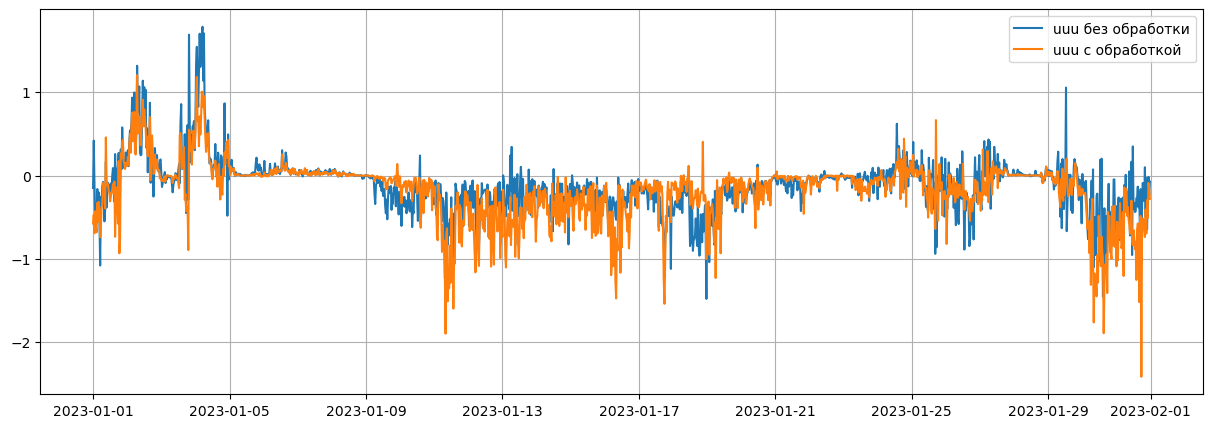

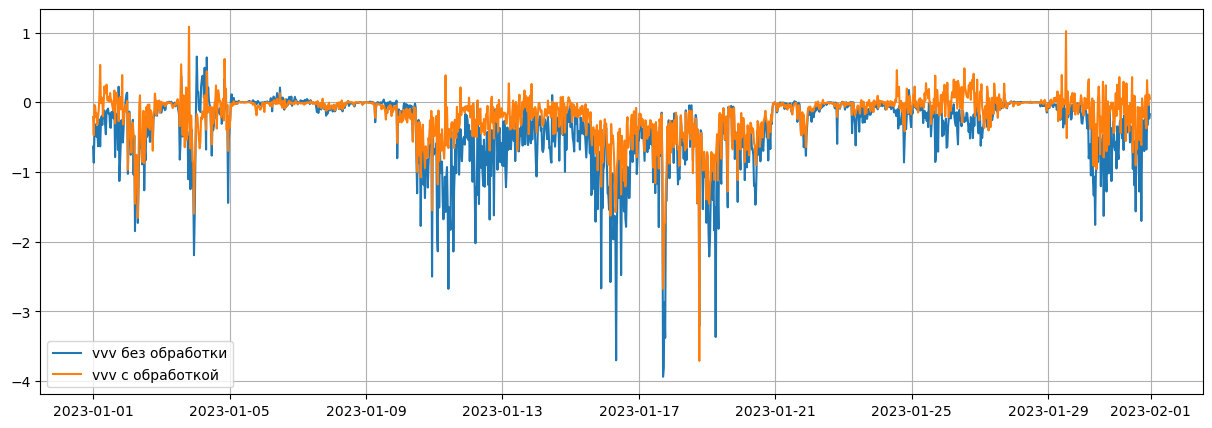

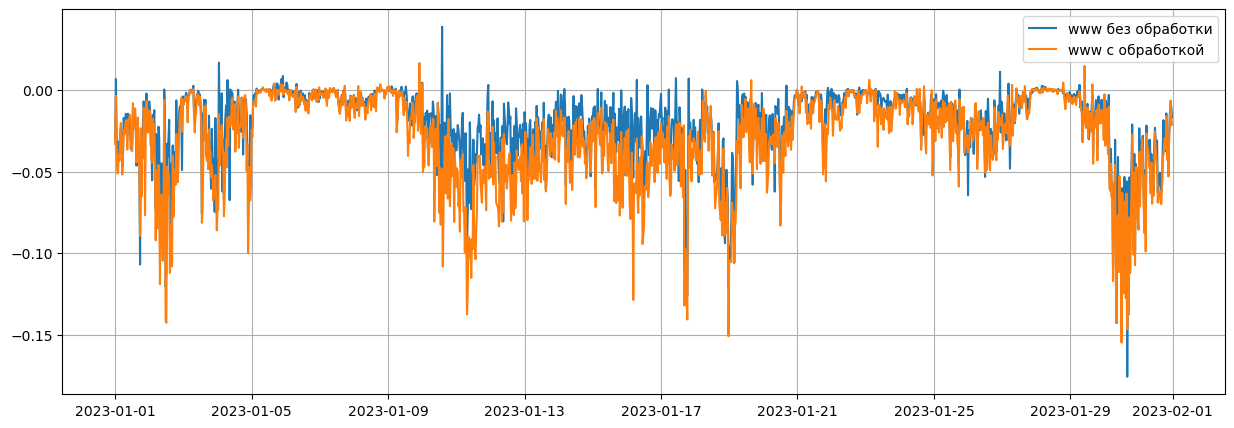

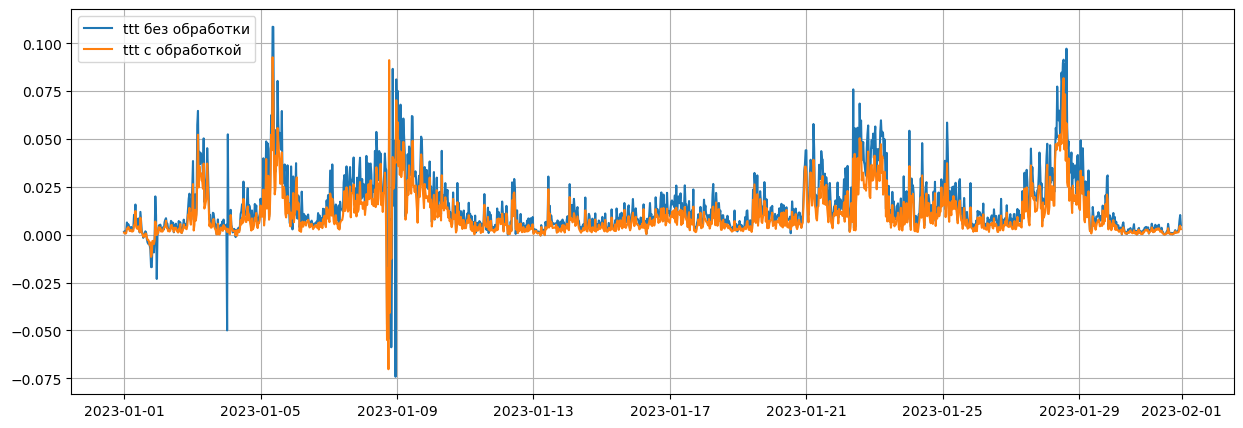

In [11]:
for var_name in df1_moments:
    plt.figure(figsize=(15,5))
    plt.plot(df_moments[var_name], label = f'{var_name} без обработки')
    plt.plot(df1_moments[var_name], label = f'{var_name} с обработкой')
    plt.legend()
    plt.grid()
    plt.show()
    plt.close()